In [1]:
import numpy as np  # whole numpy lib is available, prepend 'np.'
from numpy import average, std
from numpy.random import random, randint, normal, shuffle,uniform
import scipy
from scipy.stats import ttest_ind
import seaborn as sns
import fnmatch
import os  # handy system and path functions
import sys  # to get file system encoding
import csv
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd  
import matplotlib
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)
import mne
#import FOOOF
from mne.time_frequency import tfr_morlet

Python version 3.7.1 (default, Dec 14 2018, 19:28:38) 
[GCC 7.3.0]
Pandas version 0.23.4
Matplotlib version 3.0.2


In [2]:
ROOT='/data/backed_up/shared/ThalHi_data/eeg_preproc/Em/'

In [3]:
c=mne.read_epochs(ROOT+'cue-epo.fif')
c

Reading /data/backed_up/shared/ThalHi_data/eeg_preproc/Em/cue-epo.fif ...
    Found the data of interest:
        t =    -800.78 ...    1500.00 ms
        0 CTF compensation matrices available
411 matching events found
Applying baseline correction (mode: mean)
411 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 18 columns
0 projection items activated


<EpochsFIF  |   411 events (all good), -0.800781 - 1.5 sec, baseline [-0.800781, -0.3], ~240.5 MB, data loaded, with metadata,
 'Donut_Circle_blue_trig': 65
 'Donut_Circle_red_trig': 53
 'Donut_Polygon_blue_trig': 42
 'Donut_Polygon_red_trig': 51
 'Filled_Circle_blue_trig': 43
 'Filled_Circle_red_trig': 58
 'Filled_Polygon_blue_trig': 47
 'Filled_Polygon_red_trig': 52>

In [4]:
c.metadata.reset_index(drop=True).iloc[81]

cue                 none
Color               none
Texture             none
Shape               none
Task                none
cue_stim            none
Trial_type          none
pic                 none
pic_stim            none
img_path            none
trial_Corr            -1
rt                     0
What_Is_CorrResp      -1
Subject_Respo         -1
trial_n               82
block                  1
sub                   em
trigs               none
Name: 81, dtype: object

In [5]:
cue=c.drop([81,162,245,327,410])
#the indices of the 83rd trial of each block which didn't get recorded into the beahvioral csv

Dropped 5 epochs


In [29]:
cue.metadata

,cue,Color,Texture,Shape,Task,cue_stim,Trial_type,pic,pic_stim,img_path,trial_Corr,rt,What_Is_CorrResp,Subject_Respo,trial_n,block,sub,trigs
1,dcr,red,Donut,Circle,Face,Circle(__class__=<class 'psychopy.visual.circl...,Stay,Scene,ImageStim(__class__=<class 'psychopy.visual.im...,Z:\ThalHi/localizer_stim/scenes\75.jpg,1.0,1.120097,0.0,0.0,0.0,1.0,em,"{'Donut_Circle_red_trig': 105, 'Scene': 153, '..."
5,dcr,red,Donut,Circle,Face,Circle(__class__=<class 'psychopy.visual.circl...,Stay,Scene,ImageStim(__class__=<class 'psychopy.visual.im...,Z:\ThalHi/localizer_stim/scenes\Sc136.jpg,1.0,0.780028,0.0,0.0,1.0,1.0,em,"{'Donut_Circle_red_trig': 105, 'Scene': 153, '..."
9,dpr,red,Donut,Polygon,Face,ShapeStim(__class__=<class 'psychopy.visual.sh...,Stay,Face,ImageStim(__class__=<class 'psychopy.visual.im...,Z:\ThalHi/localizer_stim/faces\195.jpg,1.0,0.700019,1.0,1.0,2.0,1.0,em,"{'Donut_Polygon_red_trig': 101, 'Face': 151, '..."
13,fpr,red,Filled,Polygon,Face,ShapeStim(__class__=<class 'psychopy.visual.sh...,EDS,Scene,ImageStim(__class__=<class 'psychopy.visual.im...,Z:\ThalHi/localizer_stim/scenes\Sc106.jpg,1.0,1.139992,0.0,0.0,3.0,1.0,em,"{'Filled_Polygon_red_trig': 109, 'Scene': 153,..."
17,fpr,red,Filled,Polygon,Face,ShapeStim(__class__=<class 'psychopy.visual.sh...,Stay,Face,ImageStim(__class__=<class 'psychopy.visual.im...,Z:\ThalHi/localizer_stim/faces\170.jpg,1.0,0.600038,1.0,1.0,4.0,1.0,em,"{'Filled_Polygon_red_trig': 109, 'Face': 151, ..."
21,dpb,blue,Donut,Polygon,Scene,ShapeStim(__class__=<class 'psychopy.visual.sh...,EDS,Scene,ImageStim(__class__=<class 'psychopy.visual.im...,Z:\ThalHi/localizer_stim/scenes\69.jpg,1.0,1.299959,1.0,1.0,5.0,1.0,em,"{'Donut_Polygon_blue_trig': 103, 'Scene': 153,..."
25,fcb,blue,Filled,Circle,Scene,Circle(__class__=<class 'psychopy.visual.circl...,EDS,Face,ImageStim(__class__=<class 'psychopy.visual.im...,Z:\ThalHi/localizer_stim/faces\190.jpg,1.0,0.840053,0.0,0.0,6.0,1.0,em,"{'Filled_Circle_blue_trig': 115, 'Face': 151, ..."
29,fcr,red,Filled,Circle,Scene,Circle(__class__=<class 'psychopy.visual.circl...,Stay,Scene,ImageStim(__class__=<class 'psychopy.visual.im...,Z:\ThalHi/localizer_stim/scenes\19.jpg,1.0,0.620061,1.0,1.0,7.0,1.0,em,"{'Filled_Circle_red_trig': 113, 'Scene': 153, ..."
33,fcb,blue,Filled,Circle,Scene,Circle(__class__=<class 'psychopy.visual.circl...,Stay,Face,ImageStim(__class__=<class 'psychopy.visual.im...,Z:\ThalHi/localizer_stim/faces\177.jpg,1.0,0.620120,0.0,0.0,8.0,1.0,em,"{'Filled_Circle_blue_trig': 115, 'Face': 151, ..."
37,fcb,blue,Filled,Circle,Scene,Circle(__class__=<class 'psychopy.visual.circl...,Stay,Face,ImageStim(__class__=<class 'psychopy.visual.im...,Z:\ThalHi/localizer_stim/faces\195.jpg,1.0,0.480046,0.0,0.0,9.0,1.0,em,"{'Filled_Circle_blue_trig': 115, 'Face': 151, ..."


In [25]:
behav=cue.metadata.reset_index(drop=True)
stay_inds=behav[behav.Trial_type=='Stay'].index
IDS_inds=behav[behav.Trial_type=='IDS'].index
EDS_inds=behav[behav.Trial_type=='EDS'].index

In [44]:
stay_eps=cue.copy()[stay_inds]
IDS_eps=cue.copy()[IDS_inds]
EDS_eps=cue.copy()[EDS_inds]

In [65]:
#stay_eps.plot()
EDS_eps.ch_names.index('Fz')

37

In [46]:
freqs = np.logspace(*np.log10([2, 35]), num=20)
n_cycles = freqs / 2.  # different number of cycle per frequency
power_stay, itc = tfr_morlet(stay_eps, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)
power_IDS, itc = tfr_morlet(IDS_eps, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)

power_EDS, itc = tfr_morlet(EDS_eps, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)

/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)


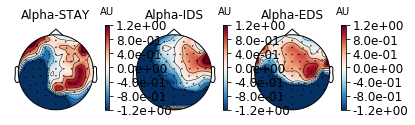

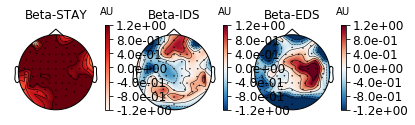

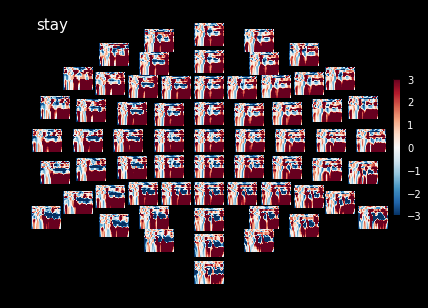

Applying baseline correction (mode: zscore)


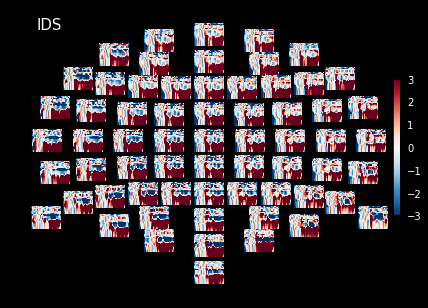

Applying baseline correction (mode: zscore)


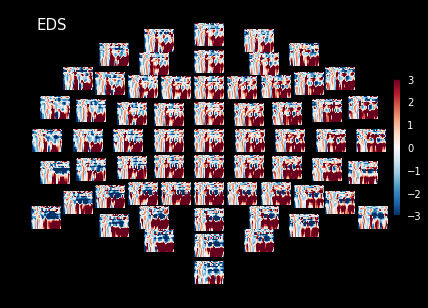

Applying baseline correction (mode: zscore)


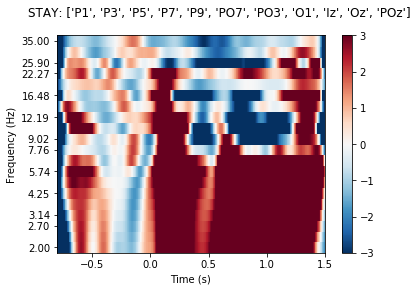

Applying baseline correction (mode: zscore)


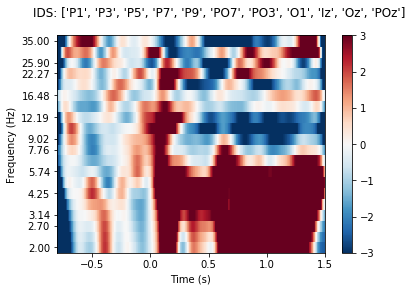

Applying baseline correction (mode: zscore)


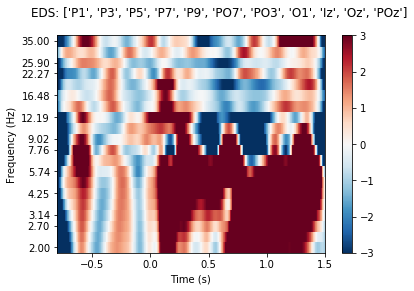

Applying baseline correction (mode: zscore)


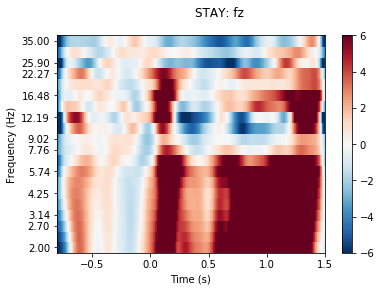

Applying baseline correction (mode: zscore)


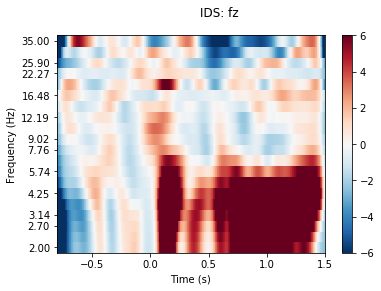

Applying baseline correction (mode: zscore)


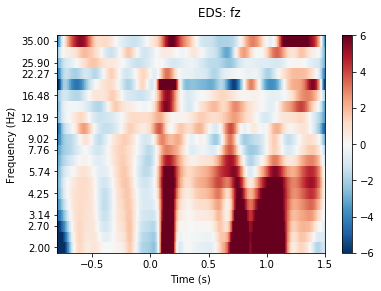

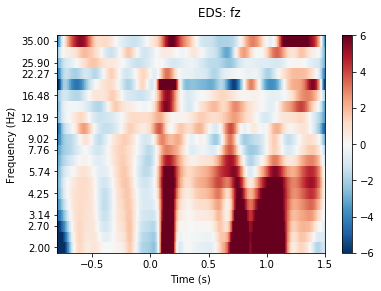

In [66]:
fig1, axis1 = plt.subplots(1, 3)
fig2,axis2=plt.subplots(1,3)
#fig3,axis3=plt.subplots(1,2)

power_stay.plot_topomap(ch_type='eeg', tmin=0.0, tmax=2, fmin=8, fmax=14, vmin=-1.2, vmax=1.2,
                   baseline=(-0.5, 0), mode='zscore', axes=axis1[0],
                   title='Alpha-STAY', show=False)
power_IDS.plot_topomap(ch_type='eeg', tmin=0.0, tmax=2, fmin=8, fmax=14,vmin=-1.2, vmax=1.2,
                   baseline=(-0.5, 0), mode='zscore', axes=axis1[1],
                   title='Alpha-IDS', show=False)
power_EDS.plot_topomap(ch_type='eeg', tmin=0.0, tmax=2, fmin=8, fmax=14,vmin=-1.2, vmax=1.2,
                   baseline=(-0.5, 0), mode='zscore', axes=axis1[2],
                   title='Alpha-EDS', show=False)
power_stay.plot_topomap(ch_type='eeg', tmin=0.0, tmax=2, fmin=18, fmax=25,vmin=-1.2, vmax=1.2,
                   baseline=(-0.5, 0), mode='zscore', axes=axis2[0],
                   title='Beta-STAY', show=False)
power_IDS.plot_topomap(ch_type='eeg', tmin=0.0, tmax=2, fmin=18, fmax=25,vmin=-1.2, vmax=1.2,
                   baseline=(-0.5, 0), mode='zscore', axes=axis2[1],
                   title='Beta-IDS', show=False)
power_EDS.plot_topomap(ch_type='eeg', tmin=0.0, tmax=2, fmin=18, fmax=25,vmin=-1.2, vmax=1.2,
                   baseline=(-0.5, 0), mode='zscore', axes=axis2[2],
                   title='Beta-EDS', show=False)
power_stay.plot_topo(baseline=(-0.5,0), mode='zscore', title='stay',vmin=-3, vmax=3)
power_IDS.plot_topo(baseline=(-0.5,0), mode='zscore', title='IDS',vmin=-3, vmax=3)
power_EDS.plot_topo(baseline=(-0.5,0), mode='zscore', title='EDS',vmin=-3, vmax=3)
power_stay.plot([19,20,21,22,23,24,25,26,27,28,29,30],vmin=-3, vmax=3, baseline=(-0.5,0), mode='zscore', title='STAY: '+str(power_stay.ch_names[19:30]))
power_IDS.plot([19,20,21,22,23,24,25,26,27,28,29,30], baseline=(-0.5,0), mode='zscore', vmin=-3, vmax=3,title='IDS: '+str(power_stay.ch_names[19:30]))
power_EDS.plot([19,20,21,22,23,24,25,26,27,28,29,30], baseline=(-0.5,0), mode='zscore',vmin=-3, vmax=3, title='EDS: '+str(power_stay.ch_names[19:30]))
power_stay.plot([37],vmin=-6, vmax=6, baseline=(-0.5,0), mode='zscore', title='STAY: fz')
power_IDS.plot([37],vmin=-6, vmax=6, baseline=(-0.5,0), mode='zscore', title='IDS: fz')
power_EDS.plot([37],vmin=-6, vmax=6, baseline=(-0.5,0), mode='zscore', title='EDS: fz')